<center><u><H1>Sentiment Analysis</H1></u></center>

After every survey we receive feedback from user in form of surveys and also plain text about the service, Our actual CSAT score can be quantitative, but their comments were being tagged as mixed sentiment. Digging into this discrepancy revealed that users were not happy with the support they received from agents.
I have reviewed several model and available and tried to present  on which type of sentiment analysis can with ease to use and more flexible.


# Why sentiment analysis?
- Social media monitoring
- Sentiment can be found also in forums, blogs, news
- brand monitoring
- Customer service
- Product analytics
- Market research and analysis

### Automated or rule-based?

#### Rule/lexicon-based
- Rely on manually crafted valance scores
- Different words might have different
- polarity in different contexts
- Can be quite fast

#### Automated/Machine learning
- Rely on having labelled historical data
- Might take a while to train
- Latest machine learning models can be quite powerful

### Importing necessary modules
General Text analysis

In [46]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords

In [37]:
# Importing the movies data set using pandas
movies = pd.read_csv('IMDB_sample.xls')
# Displaying the the first five row
movies.head()

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0


#### Preprocessing and Visualising Data

In [12]:
# Find the number of positive and negative reviews 
movies.label.value_counts(normalize=True)

0    0.504199
1    0.495801
Name: label, dtype: float64

In [25]:
# Findind the Lenght of each column

movies['length_of_review'] = movies['review'].apply(lambda x: len(x))
movies.head()

,Unnamed: 0,review,label,length_of_review
0,18245,This short spoof can be found on Elite's Mille...,0,667
1,19801,A singularly unfunny musical comedy that artif...,0,2982
2,3222,"An excellent series, masterfully acted and dir...",1,669
3,6010,The master of movie spectacle Cecil B. De Mill...,1,691
4,16355,I was gifted with this movie as it had such a ...,0,1087


In [45]:
# Joined all the positive reviews into one string
positive_reviews_text = movies[movies['label']==1]
positive_reviews_text = ' '.join(positive_reviews_text.review)

(-0.5, 399.5, 199.5, -0.5)

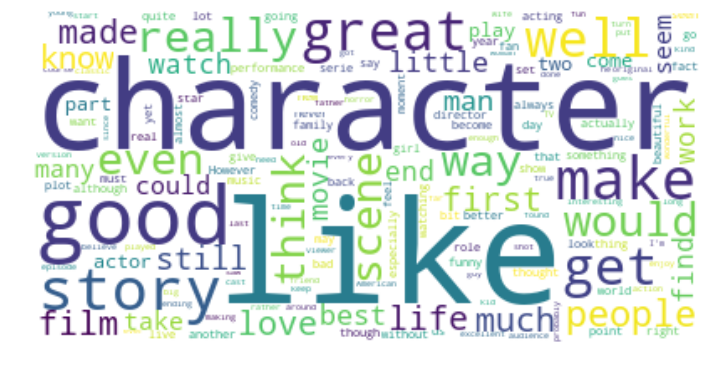

In [66]:
# Create and Generate a WordCloud Imapge
stpwrds = stopwords.words('english') + list(string.punctuation)
add_list = ['movie', 'film', 'one', 'br', 'also', 'show', 'thing', 'time', 'see']
stpwrds = stppwrds + add_list
positive_cloud = WordCloud(background_color='white', stopwords=stpwrds).generate(positive_reviews_text)

# Display the generated wordcloud image
plt.figure(figsize=(12, 12))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')

### Rule/lexicon-based Setiment Analysis

while there are other lexicon based sentiment Analysis tool textbolb I used VADER's `SentimentIntensityAnalyzer which takes in a string and returns a dictionary of scores in each of four categories:
* negative
* neutral
* positive
* compound *(computed by normalizing the scores above)*

In [100]:
# importing necessary modules 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [78]:
# reading the necessary files

amazon_reviews = pd.read_csv('amazonreviews.tsv', sep='\t')
amazon_reviews.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [79]:
# value counts of both poistive and negative reviews
amazon_reviews.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [80]:
# checking any blanks
amazon_reviews.isnull().sum() # three are no blank in the dataframe

label     0
review    0
dtype: int64

In [84]:
# applyting polariyt scores for the review column
amazon_reviews['scores'] = amazon_reviews['review'].apply(lambda x: sid.polarity_scores(x) )
amazon_reviews.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [91]:
# creating the compound scores from the scores column

amazon_reviews['polarity_score'] = amazon_reviews['scores'].apply(lambda d: d['compound'])
amazon_reviews['negative'] = amazon_reviews['scores'].apply(lambda d: d['neg'])
amazon_reviews['neutral'] = amazon_reviews['scores'].apply(lambda d: d['neu'])
amazon_reviews['positive'] = amazon_reviews['scores'].apply(lambda d: d['pos'])

amazon_reviews.head()

,label,review,scores,polarity_score,negative,neutral,positive
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,0.088,0.669,0.243
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,0.018,0.837,0.145
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,0.040,0.692,0.268
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,0.090,0.615,0.295
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,0.000,0.746,0.254


In [96]:
# relabeling the scores 

amazon_reviews['comp_score'] = amazon_reviews['polarity_score'].apply(lambda c: 'pos' if c >=0 else 'neg')

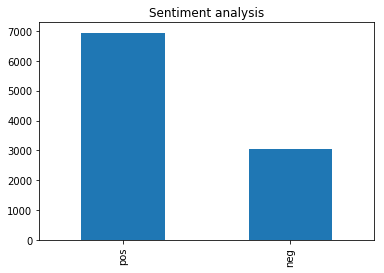

In [97]:
# visulizing the scores

%matplotlib inline
amazon_reviews.comp_score.value_counts().plot(kind='bar', title="Sentiment analysis")

In [98]:
amazon_reviews.head()

,label,review,scores,polarity_score,negative,neutral,positive,sentiment,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,0.088,0.669,0.243,Positive,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,0.018,0.837,0.145,Positive,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,0.040,0.692,0.268,Positive,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,0.090,0.615,0.295,Positive,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,0.000,0.746,0.254,Positive,pos


### Report on Accuracy
we can use scikit-learn to determine how close VADER came to our original 10,000 labels.

In [101]:
accuracy_score(amazon_reviews['label'], amazon_reviews['comp_score'])

0.7091

In [110]:
cm = confusion_matrix(amazon_reviews['label'], amazon_reviews['comp_score'])
cm

array([[2623, 2474],
       [ 435, 4468]], dtype=int64)

In [111]:
print(classification_report(amazon_reviews['label'], amazon_reviews['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



This tells us that VADER correctly identified an Amazon review as "positive" or "negative" roughly 71% of the time. there could be some sarcasm in the reviews which could not detect

### Automated/Machine learning Sentiment analysis

In [136]:
# Importing necessary modules
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
vect = CountVectorizer()

In [124]:
# Preprocessing the data

amazon_reviews = pd.read_csv('amazonreviews.tsv', sep='\t')
amazon_reviews['label'] = amazon_reviews['label'].map({'pos':1, 'neg':0})
amazon_reviews.head()
amazon_reviews.label.value_counts()

0    5097
1    4903
Name: label, dtype: int64

In [125]:
amazon_reviews.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [151]:
# Train test split 
X = amazon_reviews.review
y = amazon_reviews.label

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [152]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000,)
(3000,)
(7000,)
(3000,)


In [204]:
# fit and transform X_train into X_train_dtm

vect = CountVectorizer(ngram_range=(1,2))

X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(7000, 249687)

In [205]:
# transform X_test into X_test_dtm
X_test_dtm = vect.transform(X_test)
X_test_dtm.shape

(3000, 249687)

### Using Navie bayes Model

In [206]:
# import and instantiate MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [207]:
# train the model using X_train_dtm
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [208]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [209]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8596666666666667

In [214]:
# Confusion matrics
print(confusion_matrix(y_test, y_pred_class))

[[1344  174]
 [ 201 1281]]


In [215]:
# Classification Report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1518
           1       0.88      0.86      0.87      1482

    accuracy                           0.88      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.88      0.88      0.87      3000



### Using Logistic Regression

In [217]:
# import and instantiate MultinomialNB
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [220]:
# train the model using X_train_dtm
lr.fit(X_train_dtm, y_train)

# make class predictions for X_test_dtm
y_pred_class = lr.predict(X_test_dtm)

# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.875

In [219]:
# Confusion matrics

print(confusion_matrix(y_test, y_pred_class))

[[1344  174]
 [ 201 1281]]


In [221]:
# Classification Report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1518
           1       0.88      0.86      0.87      1482

    accuracy                           0.88      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.88      0.88      0.87      3000



Conslusion is Machine learning models are much more accurate than lexicon or rule-based models